In [1]:
!pip install easyocr

  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Using cached torch-2.1.2-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.16.2-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pillow-10.2.0-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached shapely-2.0.2-cp311-cp311-win_amd64.whl.metadata (7.2 kB)
  Using cached pyclipper-1.3.0.post5-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached ninja-1.11.1.1-py2.py3-none-win_amd64.whl.metadata (5.4 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.me

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.2-cp311-cp311-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.47.2-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [1]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

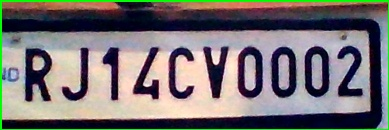

In [3]:
Image("../plates/scaned_img_0.jpg")

In [4]:

reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:

output = reader.readtext('../plates/scaned_img_0.jpg')

In [6]:
output

[([[16, 33], [374, 33], [374, 110], [16, 110]],
  'RJiLcVOO02 ',
  0.16913601161055908)]

In [15]:
cord = output[-1][0]

In [16]:
cord

[[22, 4], [248, 4], [248, 52], [22, 52]]

In [17]:
a = list(zip(*cord))
a

[(22, 248, 248, 22), (4, 4, 52, 52)]

In [18]:
min(a[0])

22

In [19]:
min(a[1])

4

In [20]:
max(a[0])

248

In [21]:
max(a[1])

52

In [22]:

x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [23]:
x_min, y_min

(22, 4)

In [24]:

x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [25]:
x_max, y_max

(248, 52)

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

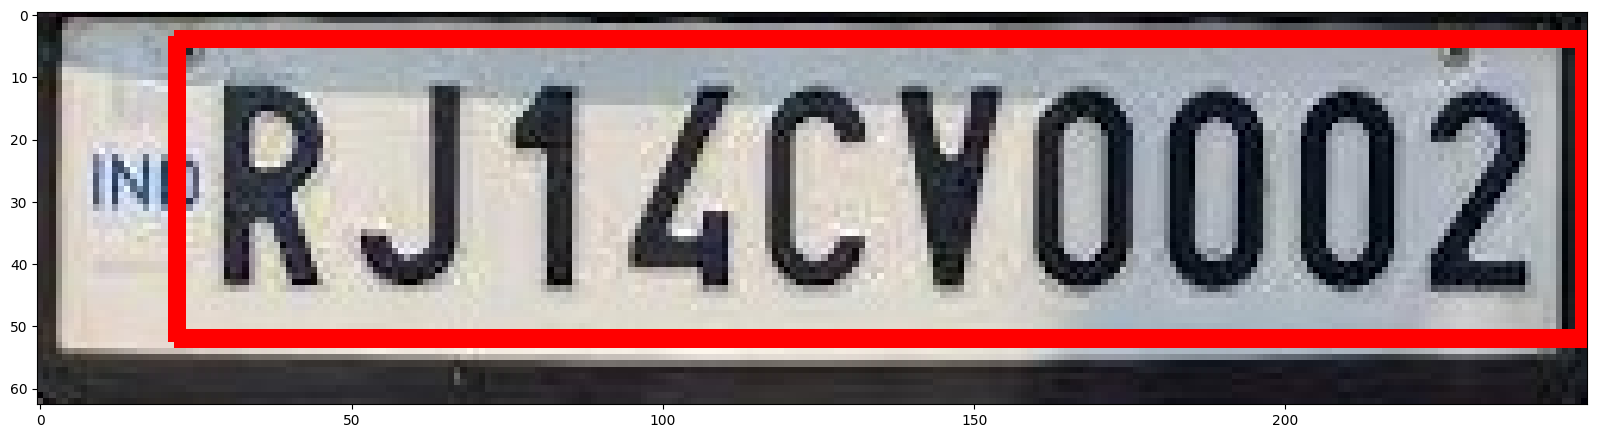

In [27]:
image = cv2.imread('../plates/download.jpeg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))